In [1]:
import psycopg2
import pandas as pd
from sklearn.cross_validation import train_test_split

def load_labels():
    db = psycopg2.connect(database='martinrasumoff')
    cursor = db.cursor()

    #Loading Labels
    cursor.execute("select * from labels_water_pumps;")
    list_labels = cursor.fetchall()
   
    labels_id =[]
    labels_class =[]
    for each in list_labels:
        labels_id.append(each[0])
        labels_class.append(each[1])
        
    series_labels = pd.DataFrame(labels_class, index=labels_id)

    return series_labels

df_labels = load_labels()

df_labels.columns = ['label']
print df_labels.head()
print df_labels.tail()

                label
69572      functional
8776       functional
34310      functional
67743  non functional
19728      functional
            label
60739  functional
27263  functional
37057  functional
31282  functional
26348  functional


In [2]:
def load_wells():
    db = psycopg2.connect(database='martinrasumoff')
    cursor = db.cursor()

    #Loading Pump Data
    cursor.execute("select * from water_pumps;")
    list_pumps = cursor.fetchall()

    list_pumps_id = []
    list_pumps_fields = []
    for each in list_pumps:
        list_pumps_id.append(each[0])
        list_pumps_fields.append(each)

    #Converting wells data into a pandas Data Frame
    df_pumps = pd.DataFrame(list_pumps_fields, index=list_pumps_id)

    return df_pumps

df_data = load_wells()

print df_data.head()
print df_data.tail()

          0     1           2             3     4             5          6   \
69572  69572  6000  2011-03-14         Roman  1390         Roman  34.938093   
8776    8776     0  2013-03-06       Grumeti  1399       GRUMETI  34.698766   
34310  34310    25  2013-02-25  Lottery Club   686  World vision  37.460664   
67743  67743     0  2013-01-28        Unicef   263        UNICEF  38.486161   
19728  19728     0  2011-07-13   Action In A     0       Artisan  31.130847   

              7                     8  9          ...                  30  \
69572  -9.856322                  none  0         ...            annually   
8776   -2.147466              Zahanati  0         ...           never pay   
34310  -3.821329           Kwa Mahundi  0         ...          per bucket   
67743 -11.155298  Zahanati Ya Nanyumbu  0         ...           never pay   
19728  -1.825359               Shuleni  0         ...           never pay   

         31    32            33            34                 

In [3]:
df_data.columns = ['id','amount_tsh',
                    'date_recorded',
                    'funder',
                    'gps_height',
                    'installer',
                    'longitude',
                    'latitude',
                    'wpt_name',
                    'num_private',
                    'basin',
                    'subvillage',
                    'region',
                    'region_code',
                    'district_code',
                    'lga',
                    'ward',
                    'population',
                    'public_meeting',
                    'recorded_by',
                    'scheme_management',
                    'scheme_name',
                    'permit',
                    'construction_year',
                    'extraction_type',
                    'extraction_type_group',
                    'extraction_type_class',
                    'management',
                    'management_group',
                    'payment',
                    'payment_type',
                    'water_quality',
                    'quality_group',
                    'quantity',
                    'quantity_group',
                    'source',
                    'source_type',
                    'source_class',
                    'waterpoint_type',
                    'waterpoint_type_group']

print df_data.head()
print df_data.tail()

          id  amount_tsh date_recorded        funder  gps_height  \
69572  69572        6000    2011-03-14         Roman        1390   
8776    8776           0    2013-03-06       Grumeti        1399   
34310  34310          25    2013-02-25  Lottery Club         686   
67743  67743           0    2013-01-28        Unicef         263   
19728  19728           0    2011-07-13   Action In A           0   

          installer  longitude   latitude              wpt_name num_private  \
69572         Roman  34.938093  -9.856322                  none           0   
8776        GRUMETI  34.698766  -2.147466              Zahanati           0   
34310  World vision  37.460664  -3.821329           Kwa Mahundi           0   
67743        UNICEF  38.486161 -11.155298  Zahanati Ya Nanyumbu           0   
19728       Artisan  31.130847  -1.825359               Shuleni           0   

               ...          payment_type water_quality quality_group  \
69572          ...              annually    

In [4]:
print df_data.head()
print df_labels.head()
print df_data.tail()
print df_labels.tail()

          id  amount_tsh date_recorded        funder  gps_height  \
69572  69572        6000    2011-03-14         Roman        1390   
8776    8776           0    2013-03-06       Grumeti        1399   
34310  34310          25    2013-02-25  Lottery Club         686   
67743  67743           0    2013-01-28        Unicef         263   
19728  19728           0    2011-07-13   Action In A           0   

          installer  longitude   latitude              wpt_name num_private  \
69572         Roman  34.938093  -9.856322                  none           0   
8776        GRUMETI  34.698766  -2.147466              Zahanati           0   
34310  World vision  37.460664  -3.821329           Kwa Mahundi           0   
67743        UNICEF  38.486161 -11.155298  Zahanati Ya Nanyumbu           0   
19728       Artisan  31.130847  -1.825359               Shuleni           0   

               ...          payment_type water_quality quality_group  \
69572          ...              annually    

In [5]:
print df_data.head()
print df_labels.head()
print df_data.tail()
print df_labels.tail()
print df_data.shape
print df_labels.shape

df_complete = pd.concat([df_data,df_labels],axis=1)

print df_complete.shape
print df_complete.columns.values



          id  amount_tsh date_recorded        funder  gps_height  \
69572  69572        6000    2011-03-14         Roman        1390   
8776    8776           0    2013-03-06       Grumeti        1399   
34310  34310          25    2013-02-25  Lottery Club         686   
67743  67743           0    2013-01-28        Unicef         263   
19728  19728           0    2011-07-13   Action In A           0   

          installer  longitude   latitude              wpt_name num_private  \
69572         Roman  34.938093  -9.856322                  none           0   
8776        GRUMETI  34.698766  -2.147466              Zahanati           0   
34310  World vision  37.460664  -3.821329           Kwa Mahundi           0   
67743        UNICEF  38.486161 -11.155298  Zahanati Ya Nanyumbu           0   
19728       Artisan  31.130847  -1.825359               Shuleni           0   

               ...          payment_type water_quality quality_group  \
69572          ...              annually    

In [6]:
df_data_basin = pd.get_dummies(df_data['basin'])
print 'basin:',df_data_basin.shape
df_data_public_meeting = pd.get_dummies(df_data['public_meeting'])
print 'Public Meeting:',df_data_public_meeting.shape
df_data_scheme_mgmnt = pd.get_dummies(df_data['scheme_management'])
print 'Scheme Management:',df_data_scheme_mgmnt.shape
df_data_permit = pd.get_dummies(df_data['permit'])
print 'permit:',df_data_permit.shape
df_data_extraction_type_group = pd.get_dummies(df_data['extraction_type_group'])
print 'Data Extraction:',df_data_extraction_type_group.shape
df_data_extraction_type_class = pd.get_dummies(df_data['extraction_type_class'])
print 'Data Extr Type:',df_data_extraction_type_class.shape
df_data_management_group = pd.get_dummies(df_data['management_group'])
print 'Management Group:',df_data_management_group.shape
df_data_payment_type = pd.get_dummies(df_data['payment_type'])
print 'Payment Type:',df_data_payment_type.shape
df_data_quality_group = pd.get_dummies(df_data['quality_group'])
print 'Quality Group:',df_data_quality_group.shape
df_data_quantity_group = pd.get_dummies(df_data['quantity_group'])
print 'Quantity Group:',df_data_quantity_group.shape
df_data_source_type = pd.get_dummies(df_data['source_type'])
print 'Source Type:',df_data_source_type.shape
df_data_source_class = pd.get_dummies(df_data['source_class'])
print 'Source Class:',df_data_source_class.shape
df_data_waterpoint_type_group = pd.get_dummies(df_data['waterpoint_type_group'])
print 'Waterpoint Type:',df_data_waterpoint_type_group.shape

basin: (59400, 9)
Public Meeting: (59400, 2)
Scheme Management: (59400, 12)
permit: (59400, 2)
Data Extraction: (59400, 13)
Data Extr Type: (59400, 7)
Management Group: (59400, 5)
Payment Type: (59400, 7)
Quality Group: (59400, 6)
Quantity Group: (59400, 5)
Source Type: (59400, 7)
Source Class: (59400, 3)
Waterpoint Type: (59400, 6)


In [7]:
df_data = df_data[['amount_tsh','gps_height','longitude','latitude','region_code','district_code',\
                   'population']]

df_coded = pd.concat([df_data,df_data_basin,df_data_public_meeting,df_data_scheme_mgmnt,df_data_permit,\
                      df_data_extraction_type_group,df_data_extraction_type_class,df_data_management_group,\
                      df_data_payment_type,df_data_quality_group,df_data_quantity_group,\
                      df_data_source_type,df_data_source_class,df_data_waterpoint_type_group],axis=1)

print df_data.shape
print df_coded.shape


(59400, 7)
(59400, 91)


In [8]:
df_coded.sort_index(inplace=True)
df_labels.sort_index(inplace=True)

print (df_labels.index == df_coded.index).sum()
print df_coded.shape

print len(df_labels)
print len(df_coded)

59400
(59400, 91)
59400
59400


In [9]:
print df_coded.tail()
print df_labels.tail()

       amount_tsh  gps_height  longitude   latitude  region_code  \
74240           0        1183  37.007726  -3.280868            2   
74242           0           0  33.724987  -8.940758           12   
74243           0        1188  33.963539  -1.429477           20   
74246          50        1428  35.630481  -7.710549           11   
74247          50         965  35.432998 -10.639270           10   

       district_code  population  Internal  Lake Nyasa  Lake Rukwa  ...    \
74240              7         350         0           0           0  ...     
74242              2           0         0           0           0  ...     
74243              6          95         0           0           0  ...     
74246              1           1         0           0           0  ...     
74247              2         900         0           0           0  ...     

       spring  groundwater  surface  unknown  cattle trough  \
74240       0            0        1        0              0   
74

In [10]:
print (df_labels.index == df_coded.index).sum()
print df_coded.shape



59400
(59400, 91)


In [11]:
print df_coded.head()
print df_labels.head()

   amount_tsh  gps_height  longitude  latitude  region_code  district_code  \
0           0           0  33.125828 -5.118154           14              3   
1           0        1978  34.770717 -9.395642           11              4   
2           0           0  36.115056 -6.279268            1              4   
3          10        1639  37.147432 -3.187555            3              5   
4           0           0  36.164893 -6.099289            1              4   

   population  Internal  Lake Nyasa  Lake Rukwa  ...    spring  groundwater  \
0           0         0           0           0  ...         0            1   
1          20         0           0           0  ...         0            1   
2           0         0           0           0  ...         0            1   
3          25         0           0           0  ...         1            1   
4           0         0           0           0  ...         0            1   

   surface  unknown  cattle trough  communal standpipe  

In [12]:
%matplotlib inline

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

print df_coded.shape
X_pumps_train, X_pumps_test, y_pumps_train, y_pumps_test = train_test_split(df_coded, df_labels, test_size=0.25, random_state=98)

X = X_pumps_train
y = y_pumps_train[['label']]

print X.shape
print y.shape

print X.head()
print y.head()



(59400, 91)
(44550, 91)
(44550, 1)
       amount_tsh  gps_height  longitude      latitude  region_code  \
16140           0           0  38.774116 -4.756634e+00            4   
44744           0        1395  34.916169 -5.236666e+00           13   
19311           0        1370  30.444252 -5.605908e+00           15   
56990         200        1478  38.357787 -4.874402e+00            4   
19176           0           0   0.000000 -2.000000e-08           17   

       district_code  population  Internal  Lake Nyasa  Lake Rukwa  ...    \
16140              8          70         0           0           0  ...     
44744              2           1         1           0           0  ...     
19311              1           1         0           0           0  ...     
56990              1           1         0           0           0  ...     
19176              1           0         0           0           0  ...     

       spring  groundwater  surface  unknown  cattle trough  \
16140       

In [14]:
import numpy as np

clf = RandomForestClassifier()

X_new_t = clf.fit_transform(X, y)

result_train = clf.score(X,y)
result_test = clf.score(X_pumps_test,y_pumps_test)

print X_new_t.shape
           
print "Train Score:",result_train
print "Test Score:",result_test

importances = clf.feature_importances_

indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(len(indices)):
    print("%d. feature %d (%f) %s" % (f + 1, indices[f], importances[indices[f]],X.columns.values[indices[f]]))

print "X_new_t",len(X_new_t)

print X_new_t.shape


(44550, 14)
Train Score: 0.977351290685
Test Score: 0.786868686869
Feature ranking:
1. feature 3 (0.161367) latitude
2. feature 2 (0.159724) longitude
3. feature 70 (0.091480) dry
4. feature 1 (0.086283) gps_height
5. feature 6 (0.056881) population
6. feature 48 (0.029606) other
7. feature 5 (0.028907) district_code
8. feature 0 (0.026604) amount_tsh
9. feature 4 (0.025141) region_code
10. feature 71 (0.023401) enough
11. feature 90 (0.016705) other
12. feature 38 (0.012980) other
13. feature 72 (0.012774) insufficient
14. feature 59 (0.011623) never pay
15. feature 31 (0.009527) True
16. feature 25 (0.009291) VWC
17. feature 30 (0.007871) False
18. feature 62 (0.007741) per bucket
19. feature 17 (0.007349) True
20. feature 66 (0.007057) good
21. feature 63 (0.006976) unknown
22. feature 37 (0.006496) nira/tanira
23. feature 86 (0.006289) communal standpipe
24. feature 73 (0.006201) seasonal
25. feature 45 (0.006065) gravity
26. feature 7 (0.006040) Internal
27. feature 58 (0.005999) 

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)


In [15]:
import matplotlib.pyplot as plt

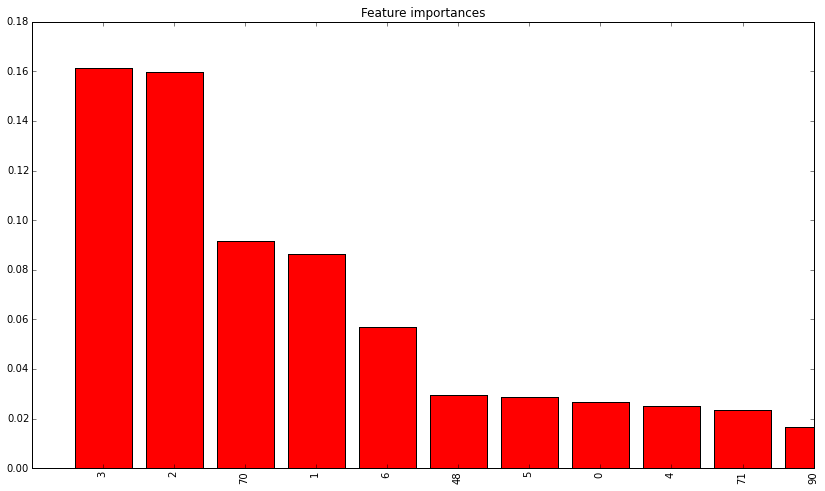

['amount_tsh' 'gps_height' 'longitude' 'latitude' 'region_code'
 'district_code' 'population' 'Internal' 'Lake Nyasa' 'Lake Rukwa'
 'Lake Tanganyika' 'Lake Victoria' 'Pangani' 'Rufiji'
 'Ruvuma / Southern Coast' 'Wami / Ruvu' 'False' 'True' 'Company' 'None'
 'Other' 'Parastatal' 'Private operator' 'SWC' 'Trust' 'VWC' 'WUA' 'WUG'
 'Water Board' 'Water authority' False True 'afridev' 'gravity'
 'india mark ii' 'india mark iii' 'mono' 'nira/tanira' 'other'
 'other handpump' 'other motorpump' 'rope pump' 'submersible' 'swn 80'
 'wind-powered' 'gravity' 'handpump' 'motorpump' 'other' 'rope pump'
 'submersible' 'wind-powered' 'commercial' 'other' 'parastatal' 'unknown'
 'user-group' 'annually' 'monthly' 'never pay' 'on failure' 'other'
 'per bucket' 'unknown' 'colored' 'fluoride' 'good' 'milky' 'salty'
 'unknown' 'dry' 'enough' 'insufficient' 'seasonal' 'unknown' 'borehole'
 'dam' 'other' 'rainwater harvesting' 'river/lake' 'shallow well' 'spring'
 'groundwater' 'surface' 'unknown' 'cattle t

In [16]:
# Plot the feature importances of the forest

plt.figure(figsize=(14,8))
plt.title("Feature importances")
plt.bar(range(len(indices)), importances[indices], color="r", align="center")
plt.xticks(range(len(indices)), indices, rotation='vertical')
plt.xlim([-1, 10])
plt.show()

print X.columns.values
for a in range(len(X.columns.values)):
    print a," - ", X.columns.values[indices[a]]





In [17]:
test = pd.read_csv('/Users/martinrasumoff/Desktop/metis/mcnulty/Pumpitup/test.csv', index_col='id')
print test.head()

test = test[['id','amount_tsh','gps_height','longitude','latitude','region_code','district_code',\
            'population','basin','public_meeting','scheme_management','permit',\
            'extraction_type_group','extraction_type_class','management_group',\
            'payment_type','quality_group','quantity_group',\
            'source_type','source_class','waterpoint_type_group']]

print test.head()

       amount_tsh date_recorded                  funder  gps_height  \
id                                                                    
50785           0    2013-02-04                    Dmdd        1996   
51630           0    2013-02-04  Government Of Tanzania        1569   
17168           0    2013-02-01                     NaN        1567   
45559           0    2013-01-22              Finn Water         267   
49871         500    2013-03-27                  Bruder        1260   

        installer  longitude   latitude                 wpt_name  num_private  \
id                                                                              
50785        DMDD  35.290799  -4.059696  Dinamu Secondary School            0   
51630         DWE  36.656709  -3.309214                  Kimnyak            0   
17168         NaN  34.767863  -5.004344           Puma Secondary            0   
45559  FINN WATER  38.058046  -9.418672           Kwa Mzee Pange            0   
49871      BRUDE

KeyError: "['id'] not in index"

In [18]:
tf_data_basin = pd.get_dummies(test['basin'])
print 'basin:',tf_data_basin.shape
tf_data_public_meeting = pd.get_dummies(test['public_meeting'])
print 'Public Meeting:',tf_data_public_meeting.shape
tf_data_scheme_mgmnt = pd.get_dummies(test['scheme_management'])
print 'Scheme Management:',tf_data_scheme_mgmnt.shape
tf_data_permit = pd.get_dummies(test['permit'])
print 'permit:',tf_data_permit.shape
tf_data_extraction_type_group = pd.get_dummies(test['extraction_type_group'])
print 'Data Extraction:',tf_data_extraction_type_group.shape
tf_data_extraction_type_class = pd.get_dummies(test['extraction_type_class'])
print 'Data Extr Type:',tf_data_extraction_type_class.shape
tf_data_management_group = pd.get_dummies(test['management_group'])
print 'Management Group:',tf_data_management_group.shape
tf_data_payment_type = pd.get_dummies(test['payment_type'])
print 'Payment Type:',tf_data_payment_type.shape
tf_data_quality_group = pd.get_dummies(test['quality_group'])
print 'Quality Group:',tf_data_quality_group.shape
tf_data_quantity_group = pd.get_dummies(test['quantity_group'])
print 'Quantity Group:',tf_data_quantity_group.shape
tf_data_source_type = pd.get_dummies(test['source_type'])
print 'Source Type:',tf_data_source_type.shape
tf_data_source_class = pd.get_dummies(test['source_class'])
print 'Source Class:',tf_data_source_class.shape
tf_data_waterpoint_type_group = pd.get_dummies(test['waterpoint_type_group'])
print 'Waterpoint Type:',tf_data_waterpoint_type_group.shape

basin: (14850, 9)
Public Meeting: (14850, 2)
Scheme Management: (14850, 11)
permit: (14850, 2)
Data Extraction: (14850, 13)
Data Extr Type: (14850, 7)
Management Group: (14850, 5)
Payment Type: (14850, 7)
Quality Group: (14850, 6)
Quantity Group: (14850, 5)
Source Type: (14850, 7)
Source Class: (14850, 3)
Waterpoint Type: (14850, 6)


In [19]:
tf_data = test[['amount_tsh','gps_height','longitude','latitude','region_code','district_code','population']]

tf_coded = pd.concat([tf_data,tf_data_basin,tf_data_public_meeting,tf_data_scheme_mgmnt,tf_data_permit,\
                      tf_data_extraction_type_group,tf_data_extraction_type_class,tf_data_management_group,\
                      tf_data_payment_type,tf_data_quality_group,tf_data_quantity_group,\
                      tf_data_source_type,tf_data_source_class,tf_data_waterpoint_type_group],axis=1)

print tf_data.shape
print tf_coded.shape
print type(tf_coded)

(14850, 7)
(14850, 90)
<class 'pandas.core.frame.DataFrame'>


In [ ]:
'''1. feature 3 (0.154770) latitude
2. feature 2 (0.154396) longitude
3. feature 1 (0.080339) gps_height
4. feature 70 (0.075335) dry
5. feature 6 (0.054576) population
6. feature 71 (0.031172) enough
7. feature 5 (0.024468) district_code
8. feature 90 (0.021932) other
9. feature 38 (0.020333) other
10. feature 4 (0.019230) region_code
11. feature 48 (0.018980) other
12. feature 59 (0.017779) never pay
13. feature 72 (0.016599) insufficient
14. feature 0 (0.015377) amount_tsh'''

In [20]:
print tf_coded.tail()
print test.tail()

       amount_tsh  gps_height  longitude   latitude  region_code  \
id                                                                 
39307           0          34  38.852669  -6.582841            6   
18990        1000           0  37.451633  -5.350428            4   
28749           0        1476  34.739804  -4.585587           13   
33492           0         998  35.432732 -10.584159           10   
68707           0         481  34.765054 -11.226012           10   

       district_code  population  Internal  Lake Nyasa  Lake Rukwa  ...    \
id                                                                  ...     
39307              1          20         0           0           0  ...     
18990              7        2960         0           0           0  ...     
28749              2         200         1           0           0  ...     
33492              2         150         0           1           0  ...     
68707              3          40         0           1       

In [21]:
'''1. feature 3 (0.154770) latitude
2. feature 2 (0.154396) longitude
3. feature 1 (0.080339) gps_height
4. feature 70 (0.075335) dry
5. feature 6 (0.054576) population
6. feature 71 (0.031172) enough
7. feature 5 (0.024468) district_code
8. feature 90 (0.021932) other
9. feature 38 (0.020333) other
10. feature 4 (0.019230) region_code
11. feature 48 (0.018980) other
12. feature 59 (0.017779) never pay
13. feature 72 (0.016599) insufficient
14. feature 0 (0.015377) amount_tsh'''

tf_coded_2 = tf_coded[['longitude','latitude','dry','gps_height','population','amount_tsh','region_code',\
                       'district_code']]

print tf_coded_2.head()
print tf_coded_2.tail()


       longitude   latitude  dry  gps_height  population  amount_tsh  \
id                                                                     
50785  35.290799  -4.059696    0        1996         321           0   
51630  36.656709  -3.309214    0        1569         300           0   
17168  34.767863  -5.004344    0        1567         500           0   
45559  38.058046  -9.418672    1         267         250           0   
49871  35.006123 -10.950412    0        1260          60         500   

       region_code  district_code  
id                                 
50785           21              3  
51630            2              2  
17168           13              2  
45559           80             43  
49871           10              3  
       longitude   latitude  dry  gps_height  population  amount_tsh  \
id                                                                     
39307  38.852669  -6.582841    0          34          20           0   
18990  37.451633  -5.350428

In [22]:
X_transformed = X_pumps_train[['longitude','latitude','dry','gps_height','population','amount_tsh','region_code',\
                       'district_code']]

y = y_pumps_train[['label']]

clf_transformed = RandomForestClassifier()
X_fit_n = clf_transformed.fit(X_transformed, y)
result_transformed = clf_transformed.score(X_transformed,y)

print tf_coded_2.head()
print tf_coded_2.tail()
a = clf_transformed.predict(tf_coded_2)

print a


       longitude   latitude  dry  gps_height  population  amount_tsh  \
id                                                                     
50785  35.290799  -4.059696    0        1996         321           0   
51630  36.656709  -3.309214    0        1569         300           0   
17168  34.767863  -5.004344    0        1567         500           0   
45559  38.058046  -9.418672    1         267         250           0   
49871  35.006123 -10.950412    0        1260          60         500   

       region_code  district_code  
id                                 
50785           21              3  
51630            2              2  
17168           13              2  
45559           80             43  
49871           10              3  
       longitude   latitude  dry  gps_height  population  amount_tsh  \
id                                                                     
39307  38.852669  -6.582841    0          34          20           0   
18990  37.451633  -5.350428

/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


In [23]:
print a

['functional' 'functional' 'functional' ..., 'functional' 'functional'
 'non functional']


In [26]:
pred = a

to_submit = []
print len(tf_coded_2)
for ind in range(len(tf_coded_2)):
    ids = tf_coded_2.index[ind]
    to_pred = pred[ind]
    #print ids,' - ',to_pred
    to_submit.append([ids,to_pred])
    
df_submit = pd.DataFrame(to_submit)
df_submit.columns = ['id','status_group']
print df_submit.head()
print df_submit.tail()

df_submit.to_csv('/Users/martinrasumoff/submission_8_RFC.csv', sep=',', index=False)


14850
      id    status_group
0  50785      functional
1  51630      functional
2  17168      functional
3  45559  non functional
4  49871      functional
          id    status_group
14845  39307  non functional
14846  18990      functional
14847  28749      functional
14848  33492      functional
14849  68707  non functional


In [27]:
print df_submit['status_group'].unique()

['functional' 'non functional' 'functional needs repair']
